In [1]:
import glob
import os
import shutil
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nibabel as nib

from modules.scandata import MriScan, MriSlice, TumourSegmentation, ScanType, ScanPlane, PatientRecord

In [2]:
T1_scan = MriScan(
    filename='data/mri-datasets/first-20-testset/images_structural/UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1.nii.gz',
    sequence=ScanType.T1
)
T1CE_scan = MriScan(
    filename='data/mri-datasets/first-20-testset/images_structural/UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1GD.nii.gz',
    sequence=ScanType.T1CE
)
T2_scan = MriScan(
    filename='data/mri-datasets/first-20-testset/images_structural/UPENN-GBM-00002_11/UPENN-GBM-00002_11_T2.nii.gz',
    sequence=ScanType.T2
)
FLAIR_scan = MriScan(
    filename='data/mri-datasets/first-20-testset/images_structural/UPENN-GBM-00002_11/UPENN-GBM-00002_11_FLAIR.nii.gz',
    sequence=ScanType.FLAIR
)
segmentation = TumourSegmentation(
    filename='data/mri-datasets/first-20-testset/AutoSeg/UPENN-GBM-00002_11_automated_approx_segm.nii.gz',
    )

In [3]:
patient_data = PatientRecord()
patient_data.add_scan_data(T1_scan)
patient_data.add_scan_data(T1CE_scan)
patient_data.add_scan_data(T2_scan)
patient_data.add_scan_data(FLAIR_scan)
patient_data.add_segmentation(segmentation)


In [46]:
set_list = []
for segslice in patient_data.segmentation.iterate_slices():
    set_list.append(frozenset(segslice.slice_data.flatten()))


In [63]:
for set_ in set(set_list):
    print(set_)# if set_ == set([0,1,2]) else 0)

frozenset({0, 2, 4})
frozenset({0, 2})
frozenset({0, 1, 2, 4})
frozenset({0})


In [5]:
#patient_data.save_multi_channel_png("channel4", [ScanType.T1CE,ScanType.T2,ScanType.FLAIR])
patient_data.save_multi_channel_png("channel4", [ScanType.T2,ScanType.T1CE, ScanType.FLAIR,ScanType.T1])


In [6]:
patient_data.scan_sequences


[<ScanType.T1: 1>, <ScanType.T1CE: 2>, <ScanType.T2: 3>, <ScanType.FLAIR: 4>]

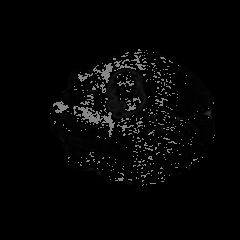

In [7]:
diff = ((T1CE_scan.get_slice(64).slice_data - T1_scan.get_slice(64).slice_data)/2)
diff_image = Image.fromarray((np.floor(diff)/15).astype('uint8'), mode='L')
diff_image

In [8]:
img = Image.open('channel4_079.png')


In [9]:
arr = np.asarray(img)

In [10]:
arr.max()

224

In [11]:
T1CE_scan.get_slice(64).save_png('gaaa.png')

In [12]:
imgnew = Image.open('gaaa.png')


In [13]:
foo = Image.fromarray(T1CE_scan.get_slice(64).slice_data*int(2**8/1863), mode='L')

In [14]:
foo.show()

In [15]:
imgnew.show()

In [16]:
foo.size

(240, 240)

In [17]:
in_size = np.array(foo.size)
out_size = np.array((224,224))

np.concatenate((in_size, out_size), axis=None)

array([240, 240, 224, 224])

In [18]:
bound = np.concatenate(((0,0), in_size), axis=None)

In [19]:
bound

array([  0,   0, 240, 240])

In [20]:
buffer = (in_size - out_size)/2

In [21]:
buffer

array([8., 8.])

In [22]:
t1_slice = T1_scan.get_slice(64).slice_data.flatten()
t1ce_slice = T1CE_scan.get_slice(64).slice_data.flatten()

SLICE=60
arr = np.array([
    T1_scan.get_slice(SLICE).slice_data.flatten(),
    T1CE_scan.get_slice(SLICE).slice_data.flatten(),
    T2_scan.get_slice(SLICE).slice_data.flatten(),
    FLAIR_scan.get_slice(SLICE).slice_data.flatten(),
]).T

In [23]:
arr.shape

(57600, 4)

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [25]:
stdscaler = StandardScaler()
arr_std = stdscaler.fit_transform(arr)
arr_std[:,0]

array([-0.60733449, -0.60733449, -0.60733449, ..., -0.60733449,
       -0.60733449, -0.60733449])

In [26]:
pca = PCA()
pca.fit(arr_std)

PCA()

In [27]:
trans_array = pca.transform(arr_std)
print(trans_array)
minmax = MinMaxScaler()
trans_array_scale = 255*minmax.fit_transform(trans_array)
img_arr_c1 = trans_array_scale[:,0].reshape(240,240).astype('uint8')
img_c1 = Image.fromarray(img_arr_c1, mode='P')
img_arr_c2 = trans_array_scale[:,1].reshape(240,240).astype('uint8')
img_c2 = Image.fromarray(img_arr_c2, mode='P')
img_arr_c3 = trans_array_scale[:,2].reshape(240,240).astype('uint8')
img_c3 = Image.fromarray(img_arr_c3, mode='P')
img_arr_c4 = trans_array_scale[:,3].reshape(240,240).astype('uint8')
img_c4 = Image.fromarray(img_arr_c4, mode='P')
img_c1.show()
img_c2.show()
img_c3.show()
#img_c4.show()

[[-1.17550332e+00 -2.85535524e-02 -8.36978630e-05  1.19072237e-02]
 [-1.17550332e+00 -2.85535524e-02 -8.36978630e-05  1.19072237e-02]
 [-1.17550332e+00 -2.85535524e-02 -8.36978630e-05  1.19072237e-02]
 ...
 [-1.17550332e+00 -2.85535524e-02 -8.36978630e-05  1.19072237e-02]
 [-1.17550332e+00 -2.85535524e-02 -8.36978630e-05  1.19072237e-02]
 [-1.17550332e+00 -2.85535524e-02 -8.36978630e-05  1.19072237e-02]]


In [28]:
print(
    trans_array_scale[:,0].max(),
    trans_array_scale[:,1].max(),
    trans_array_scale[:,2].max(),
    trans_array_scale[:,3].max(),
)
print(
    trans_array_scale[:,0].min(),
    trans_array_scale[:,1].min(),
    trans_array_scale[:,2].min(),
    trans_array_scale[:,3].min(),
)

254.99999999999997 255.00000000000006 255.00000000000006 255.0
0.0 0.0 0.0 0.0


In [29]:
rgb_map123 = np.moveaxis(np.array([img_arr_c1,img_arr_c2,img_arr_c3]).astype('uint8'), 0, 2)
rgb_map234 = np.moveaxis(np.array([img_arr_c2,img_arr_c3,img_arr_c4]).astype('uint8'), 0, 2)
rgb_map124 = np.moveaxis(np.array([img_arr_c1,img_arr_c2,img_arr_c4]).astype('uint8'), 0, 2)
rgb_map134 = np.moveaxis(np.array([img_arr_c1,img_arr_c3,img_arr_c4]).astype('uint8'), 0, 2)


In [30]:
pca.explained_variance_ratio_

array([0.89658294, 0.07053224, 0.01895651, 0.01392831])

In [31]:
img_arr_c2

array([[98, 98, 98, ..., 98, 98, 98],
       [98, 98, 98, ..., 98, 98, 98],
       [98, 98, 98, ..., 98, 98, 98],
       ...,
       [98, 98, 98, ..., 98, 98, 98],
       [98, 98, 98, ..., 98, 98, 98],
       [98, 98, 98, ..., 98, 98, 98]], dtype=uint8)

In [32]:
pca.__dict__

{'n_components': None,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'n_features_in_': 4,
 '_fit_svd_solver': 'full',
 'mean_': array([-2.12175956e-17,  1.64806440e-16,  3.89811640e-17,  3.94745964e-17]),
 'noise_variance_': 0.0,
 'n_samples_': 57600,
 'n_features_': 4,
 'components_': array([[ 0.49894351,  0.50148875,  0.49245117,  0.50700716],
        [ 0.51849143,  0.4640355 , -0.61363991, -0.3732074 ],
        [-0.47249237,  0.61528625,  0.37479362, -0.50764508],
        [-0.50889388,  0.39319577, -0.49037501,  0.58818063]]),
 'n_components_': 4,
 'explained_variance_': array([3.58639404, 0.28213385, 0.07582734, 0.05571422]),
 'explained_variance_ratio_': array([0.89658294, 0.07053224, 0.01895651, 0.01392831]),
 'singular_values_': array([454.50270658, 127.47794888,  66.08765977,  56.64877301])}

In [33]:
diff = ((T1CE_scan.get_slice(64).slice_data))# - T1_scan.get_slice(100).slice_data)/2)

(np.floor(diff)/15).astype('uint8')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
BAAAA = Image.fromarray(np.floor(
    FLAIR_scan.get_slice(64).slice_data
    / FLAIR_scan.get_slice(64).slice_data.max()*255
).astype('uint8'), mode='P')

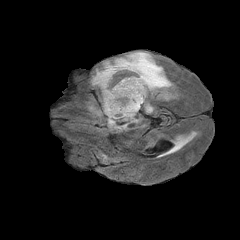

In [35]:
BAAAA

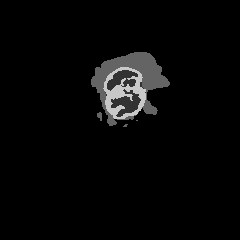

In [36]:
Image.fromarray(segmentation.get_slice(SLICE).slice_data*50, mode='P')

In [37]:
img_c4.show()

Text(0.5, 1.0, 'FLAIR')

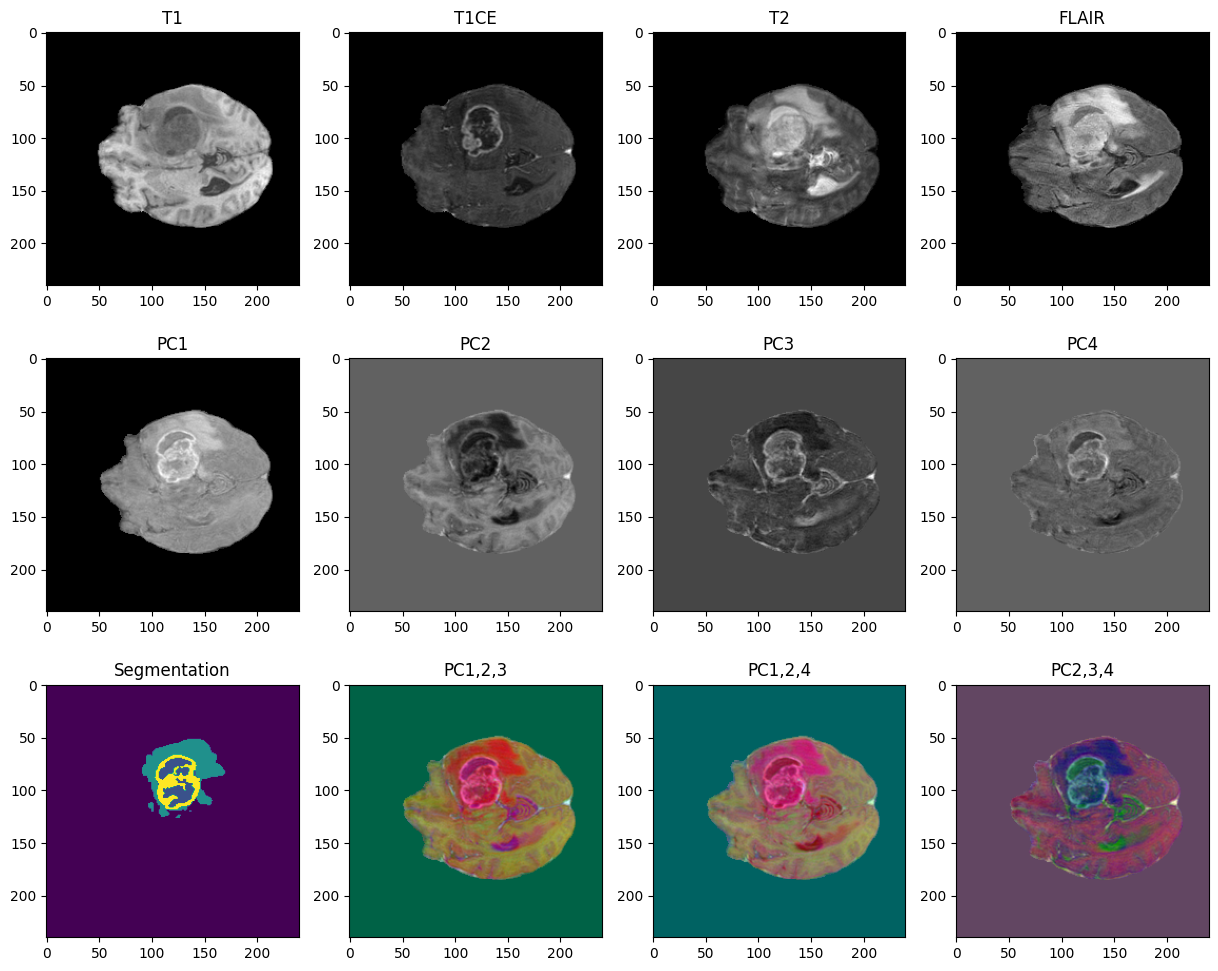

In [38]:
fig, ax = plt.subplots(3,4, figsize=(15, 12))
ax[1][0].imshow(img_arr_c1, cmap='gist_gray')
ax[1][0].set_title("PC1")
ax[1][1].imshow(img_arr_c2, cmap='gist_gray')
ax[1][1].set_title("PC2")
ax[1][2].imshow(img_arr_c3, cmap='gist_gray')
ax[1][2].set_title("PC3")
ax[1][3].imshow(img_arr_c4, cmap='gist_gray')
ax[1][3].set_title("PC4")
ax[2][0].imshow(segmentation.get_slice(SLICE).slice_data*50)
ax[2][0].set_title("Segmentation")
ax[2][1].imshow(rgb_map123)
ax[2][1].set_title("PC1,2,3")
ax[2][2].imshow(rgb_map124)
ax[2][2].set_title("PC1,2,4")
ax[2][3].imshow(rgb_map234)
ax[2][3].set_title("PC2,3,4")
FLAIR_scan.get_slice(64).slice_data
ax[0][0].imshow(T1_scan.get_slice(64).slice_data, cmap='gist_gray')
ax[0][0].set_title("T1")
ax[0][1].imshow(T1CE_scan.get_slice(64).slice_data, cmap='gist_gray')
ax[0][1].set_title("T1CE")
ax[0][2].imshow(T2_scan.get_slice(64).slice_data, cmap='gist_gray')
ax[0][2].set_title("T2")
ax[0][3].imshow(FLAIR_scan.get_slice(64).slice_data, cmap='gist_gray')
ax[0][3].set_title("FLAIR")


In [39]:
type(patient_data.segmentation)

modules.scandata.TumourSegmentation

In [40]:
set(segmentation.scan_data.flatten())

{0, 1, 2, 4}

In [41]:
np.unique(segmentation.scan_data, return_counts=True)

(array([0, 1, 2, 4], dtype=uint8), array([8727330,   15622,  155217,   29831]))

In [42]:
lol = [[0,0,0,1,0,1,1,1,0], [1,1,1,1,1,1,1,0], [0,0,0,0,0,0,0], [0,1,2,1,0,], [0,2,2,0,0,], [0,1,2,3,3,2,1,0]]
sos = set([frozenset(x) for x in lol])

In [43]:
sos

{frozenset({0}),
 frozenset({0, 1}),
 frozenset({0, 2}),
 frozenset({0, 1, 2}),
 frozenset({0, 1, 2, 3})}

In [44]:
patient_data